In [6]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('download.csv')

# 1. Shape of the Data

In [28]:
df.shape

(1338, 7)

# 2. Data type of each attribute

In [29]:
df.columns

Index([u'age', u'sex', u'bmi', u'children', u'smoker', u'region', u'charges'], dtype='object')

In [30]:
print df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


# 3.Checking the presence of missing values

In [32]:
df.isna().sum()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 4. 5 point summary of numerical attributes

In [37]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 5.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

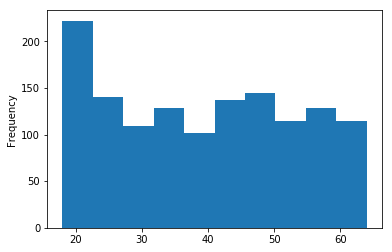

In [45]:
df['age'].plot.hist()

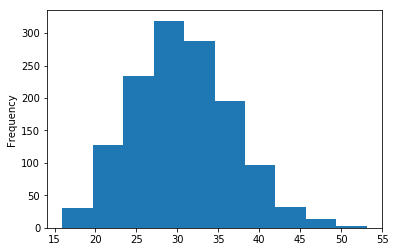

In [47]:
df['bmi'].plot.hist()

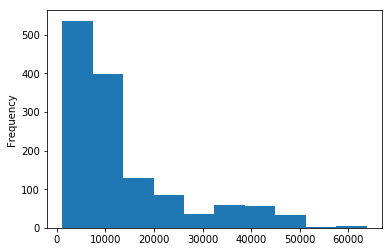

In [46]:
df['charges'].plot.hist()

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
# if result is 0 normal distribution; #if result is <0 then left skew ness; #if result is > 0 then right skew ness

In [81]:
df.skew(axis = 0, skipna = True) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

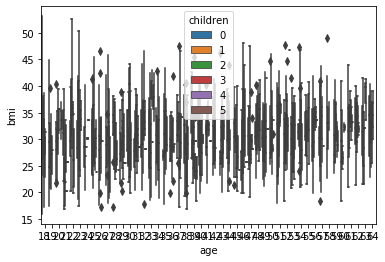

In [8]:
import seaborn as sns
sns.boxplot(df['age'], df['bmi'], hue=df['children'])

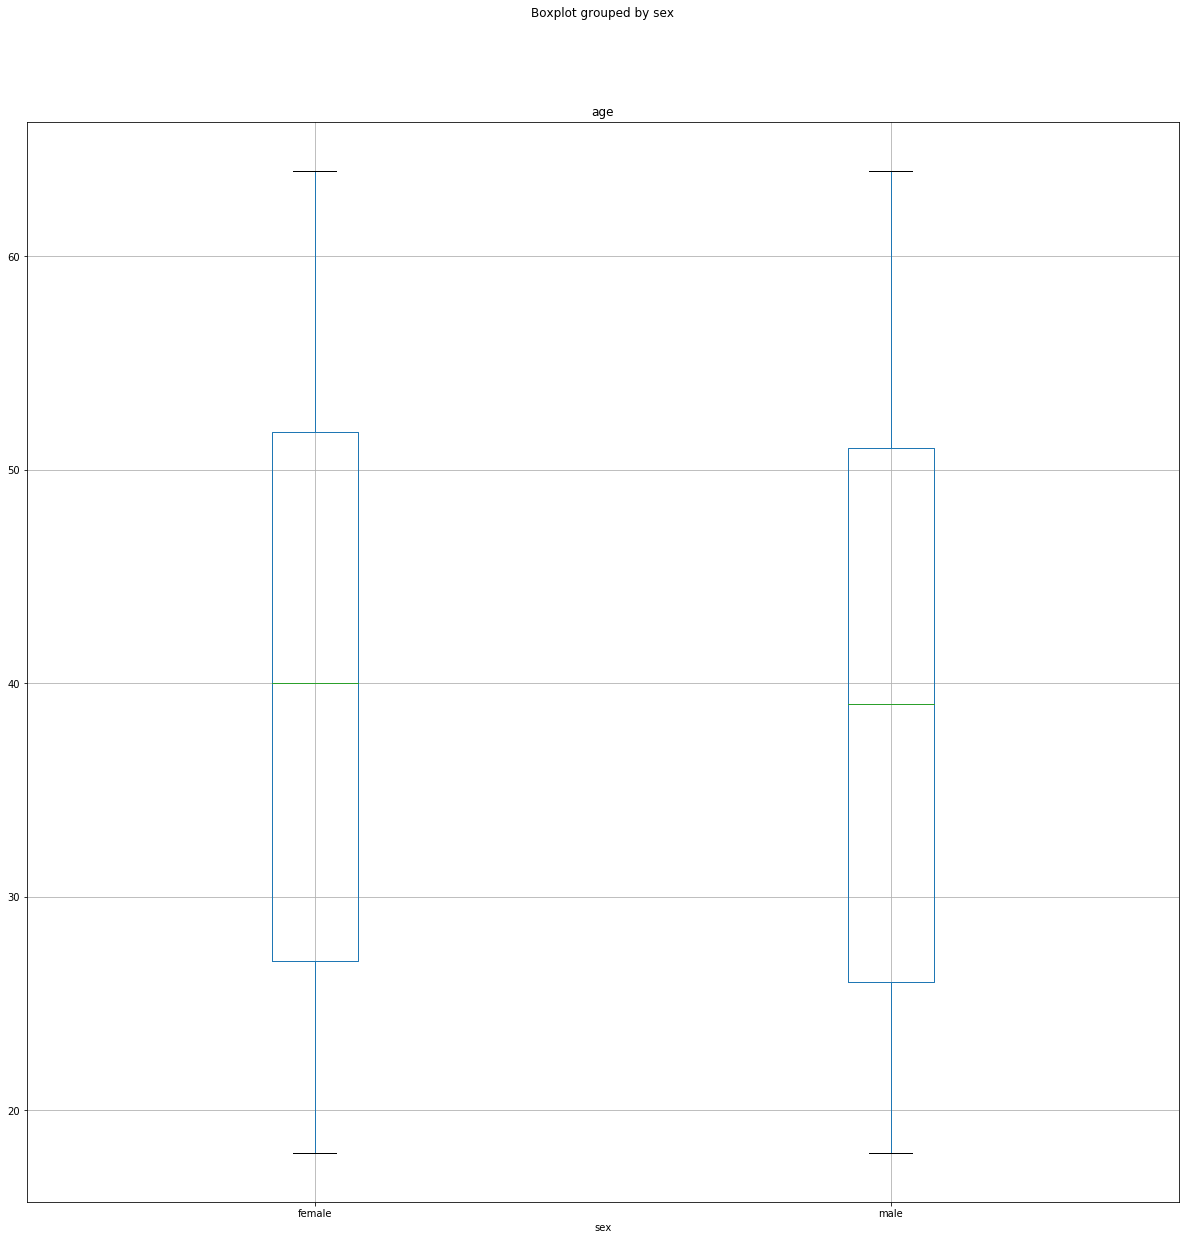

In [64]:
df.boxplot(column='sex', by='age',figsize=(20,20))

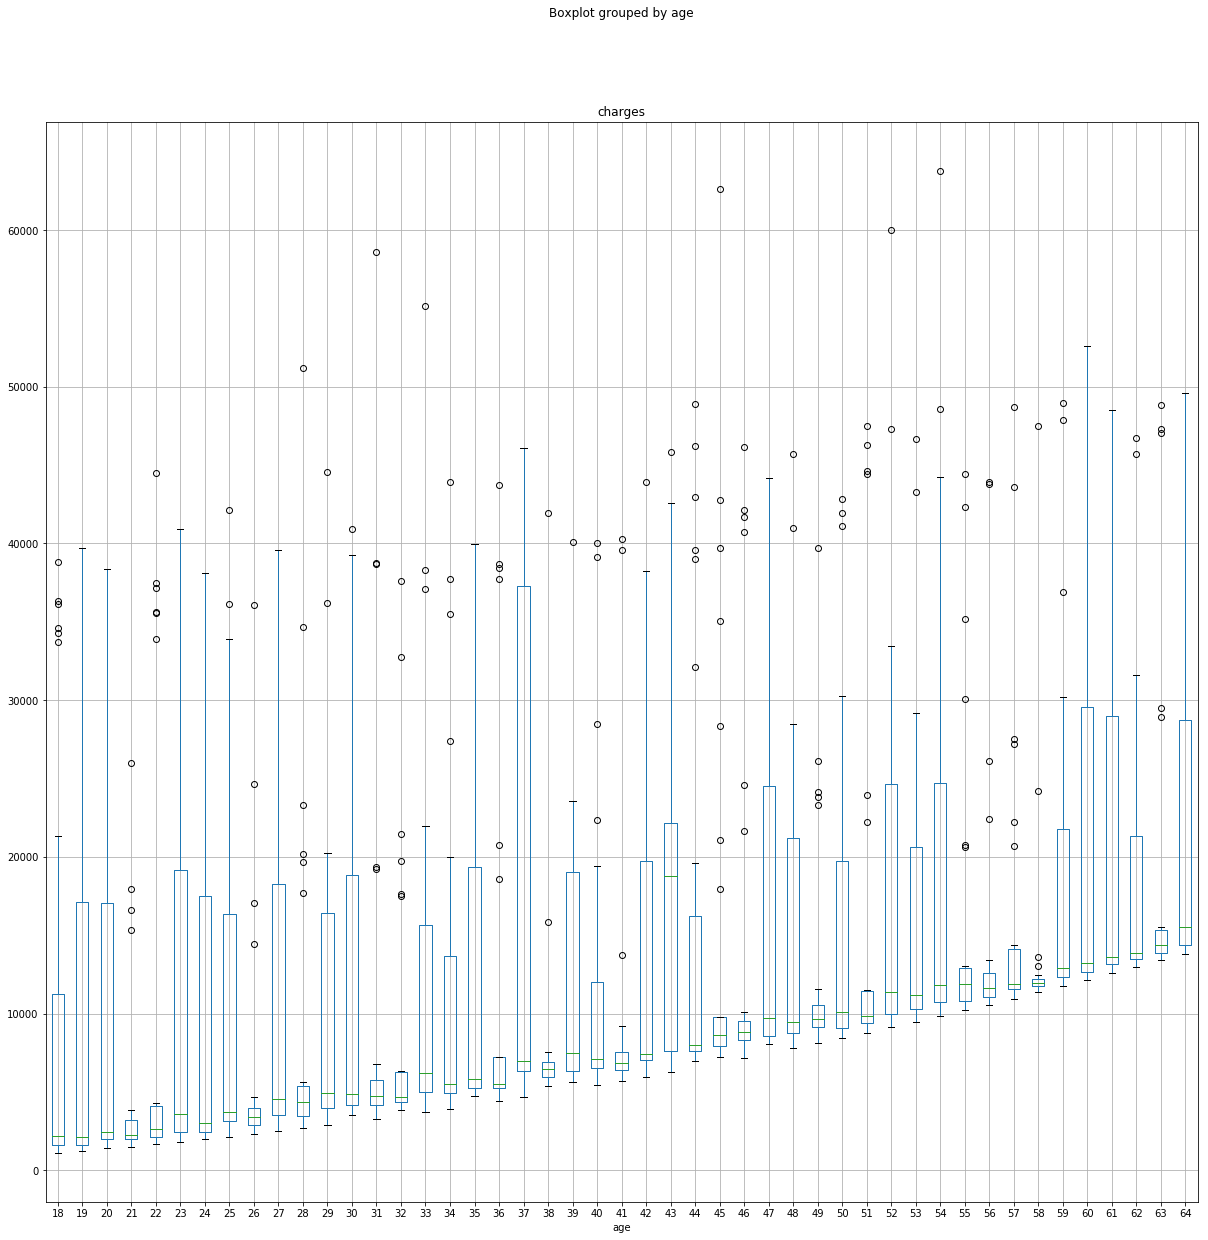

In [65]:
df.boxplot(column='age', by='charges',figsize=(20,20))

# Distribution of categorical columns (include children)

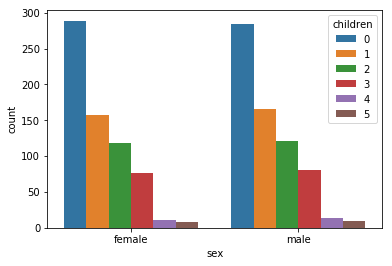

In [75]:
sns.countplot(x='sex',hue='children',data=df)

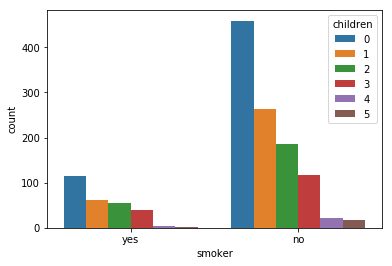

In [76]:
sns.countplot(x='smoker',hue='children',data=df)

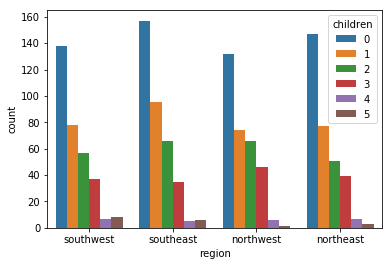

In [77]:
sns.countplot(x='region',hue='children',data=df)

# Pair plot that includes all the columns of the data frame

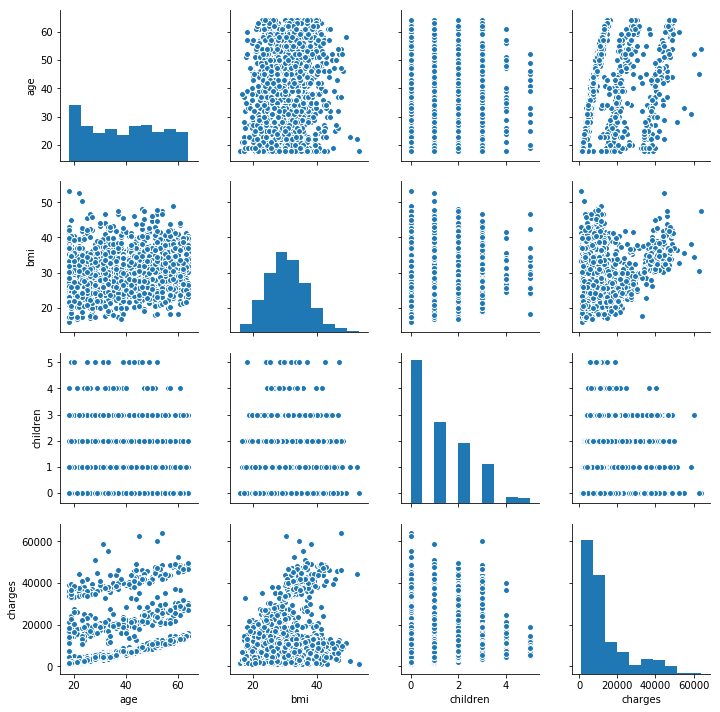

In [80]:
sns.pairplot(df)

# Do charges of people who smoke differ significantly from the people who don't?

In [124]:
smoke_yes_charges=df.loc[df['smoker'] == 'yes', 'charges']
smoke_no_charges=df.loc[df['smoker'] == 'no', 'charges']
#print smoke_yes_charges,smoke_no_chargesprint 

In [133]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(smoke_yes_charges, x2=smoke_no_charges, value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [132]:
print smoke_yes_charges.mean()
print smoke_no_charges.mean()

32050.2318315
8434.26829786



# Does bmi of males differ significantly from that of females?

In [134]:
sex_male_bmi=df.loc[df['sex'] == 'male', 'bmi' ]
sex_female_bmi=df.loc[df['sex'] == 'female', 'bmi']
#print smoke_yes_charges,smoke_no_chargesprint 

In [136]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(sex_male_bmi, x2=sex_female_bmi, value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0897434367994
accept null hypothesis


In [137]:
print sex_female_bmi.mean()
print sex_male_bmi.mean()

30.3777492447
30.9431286982


# Is the proportion of smokers significantly different in different genders?


In [128]:

contingency_table=pd.crosstab(df["smoker"],df["sex"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
from scipy import stats
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables .")
else:
    print("Retain H0,There is no relationship between 2 categorical variables .")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

('contingency_table :-\n', sex     female  male
smoker              
no         547   517
yes        115   159)
('Observed Values :-\n', array([[547, 517],
       [115, 159]], dtype=int64))
('Expected Values :-\n', array([[526.43348281, 537.56651719],
       [135.56651719, 138.43348281]]))
('Degree of Freedom:-', 1)
('chi-square statistic:-', 7.765921028604451)
('critical_value:', 3.841458820694124)
('p-value:', 0.005324114164320548)
('Significance level: ', 0.05)
('Degree of Freedom: ', 1)
('chi-square statistic:', 7.765921028604451)
('critical_value:', 3.841458820694124)
('p-value:', 0.005324114164320548)
Reject H0,There is a relationship between 2 categorical variables .
Reject H0,There is a relationship between 2 categorical variables


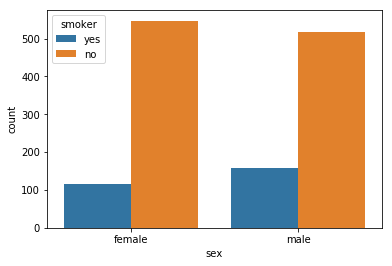

In [123]:
sns.countplot(x='sex',hue='smoker',data=df)

# Is the distribution of bmi across women with no children, one child and two children, the same ?

In [159]:
female_chil0_bmi=df.loc[(df['sex'] == 'female') & (df['children'] == 0.0)]['bmi']
female_chil1_bmi=df.loc[(df['sex'] == 'female') & (df['children'] == 1.0)]['bmi']
female_chil2_bmi=df.loc[(df['sex'] == 'female') & (df['children'] == 2.0)]['bmi']

In [160]:
from scipy.stats import ks_2samp
ks_2samp(female_chil0_bmi, female_chil1_bmi)

Ks_2sampResult(statistic=0.05326091717401771, pvalue=0.9274771791082741)

In [161]:
ks_2samp(female_chil0_bmi, female_chil2_bmi)

Ks_2sampResult(statistic=0.10479485912011866, pvalue=0.29666810650764897)

In [162]:
ks_2samp(female_chil1_bmi, female_chil2_bmi)

Ks_2sampResult(statistic=0.10929688331028609, pvalue=0.3722939478383565)